In [2]:
import numpy as np #Linear Algebra
import pandas as pd # Data frmaes
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
from matplotlib import cm

import keras  #used for Deep Learning
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler , LabelBinarizer
from sklearn.utils import shuffle



In [3]:
#loading dataset
data = pd.read_csv('IRIS.csv')

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


KeyError: 'species'

In [5]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your pandas DataFrame with a column 'target' containing the class names
le = LabelEncoder()
data['target'] = le.fit_transform(data['species'])
data = data.drop('species' , axis = 1)


In [6]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
data['target'] = data['target'].astype(float) #coverting the target column into float values

In [8]:
data


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
data.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2     0.0
1             4.9          3.0           1.4          0.2     0.0
2             4.7          3.2           1.3          0.2     0.0
3             4.6          3.1           1.5          0.2     0.0
4             5.0          3.6           1.4          0.2     0.0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3     2.0
146           6.3          2.5           5.0          1.9     2.0
147           6.5          3.0           5.2          2.0     2.0
148           6.2          3.4           5.4          2.3     2.0
149           5.9          3.0           5.1          1.8     2.0

[150 rows x 5 columns]>

In [10]:
data.isnull().sum() #checking for the missing and null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

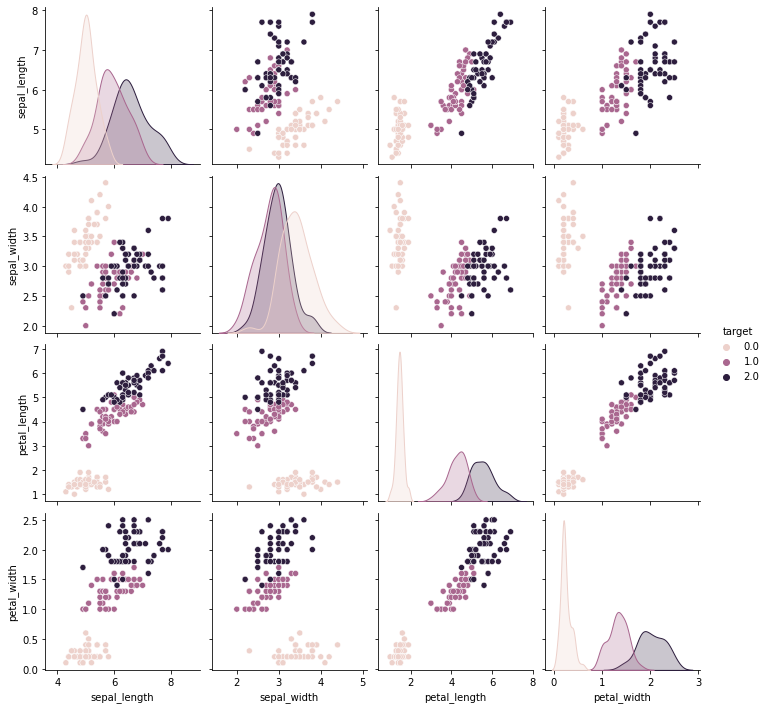

In [14]:
sns.pairplot(data = data[data.columns[0:6]] , hue = 'target')
plt.show()

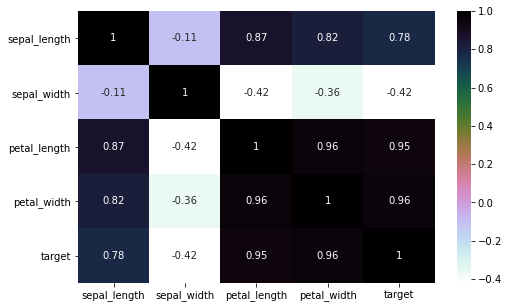

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr() , annot = True  , cmap = 'cubehelix_r')
plt.show() #show correlation matrix

In [22]:
data = shuffle(data) #performing shuffling operation

In [23]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
93,5.0,2.3,3.3,1.0,1.0
129,7.2,3.0,5.8,1.6,2.0
123,6.3,2.7,4.9,1.8,2.0
29,4.7,3.2,1.6,0.2,0.0
143,6.8,3.2,5.9,2.3,2.0
...,...,...,...,...,...
55,5.7,2.8,4.5,1.3,1.0
30,4.8,3.1,1.6,0.2,0.0
113,5.7,2.5,5.0,2.0,2.0
73,6.1,2.8,4.7,1.2,1.0


In [24]:
x = data[[ 'sepal_length' , 'sepal_width' , 'petal_length' ,  'petal_width']]
target = data[['target']]
y_true = target.copy()

In [25]:
x

,sepal_length,sepal_width,petal_length,petal_width
93,5.0,2.3,3.3,1.0
129,7.2,3.0,5.8,1.6
123,6.3,2.7,4.9,1.8
29,4.7,3.2,1.6,0.2
143,6.8,3.2,5.9,2.3
...,...,...,...,...
55,5.7,2.8,4.5,1.3
30,4.8,3.1,1.6,0.2
113,5.7,2.5,5.0,2.0
73,6.1,2.8,4.7,1.2


In [26]:
y_true

,target
93,1.0
129,2.0
123,2.0
29,0.0
143,2.0
...,...
55,1.0
30,0.0
113,2.0
73,1.0


In [28]:
x= StandardScaler().fit_transform(x)
target = LabelBinarizer().fit_transform(target)

In [30]:
target

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0,

In [31]:
x

array([[-1.02184904e+00, -1.74477836e+00, -2.60824029e-01,
        -2.61192967e-01],
       [ 1.64384411e+00, -1.24957601e-01,  1.16081857e+00,
         5.27644853e-01],
       [ 5.53333275e-01, -8.19166497e-01,  6.49027235e-01,
         7.90590793e-01],
       [-1.38535265e+00,  3.37848329e-01, -1.22754100e+00,
        -1.31297673e+00],
       [ 1.15917263e+00,  3.37848329e-01,  1.21768427e+00,
         1.44795564e+00],
       [-4.16009689e-01,  2.65187798e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.25060772e-02, -8.19166497e-01,  8.03701950e-02,
         1.75297293e-03],
       [ 5.53333275e-01,  5.69251294e-01,  5.35295827e-01,
         5.27644853e-01],
       [ 7.95669016e-01, -1.24957601e-01,  1.16081857e+00,
         1.31648267e+00],
       [-9.00681170e-01,  1.49486315e+00, -1.28440670e+00,
        -1.05003079e+00],
       [ 1.03800476e+00,  5.69251294e-01,  1.10395287e+00,
         1.71090158e+00],
       [ 9.16836886e-01, -1.24957601e-01,  3.64698715e-01,
      

In [29]:
from sklearn.model_selection import train_test_split #splitting data into training and testing data
x_train , x_test , y_train , y_test = train_test_split(x , target , test_size = 0.2 ,random_state = 101)

In [35]:
model = Sequential()
model.add(Dense(12 , input_dim = 4 , activation = 'relu'))
model.add(Dense(units = 15 , activation = 'relu'))
model.add(Dense(units = 8 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
history = model.fit(x_train , y_train , epochs = 120 , validation_data = [x_test , y_test])

Epoch 1/120
4/4 [==============================] - 3s 121ms/step - loss: 1.0463 - accuracy: 0.1833 - val_loss: 1.0367 - val_accuracy: 0.3000
Epoch 2/120
4/4 [==============================] - 0s 26ms/step - loss: 1.0318 - accuracy: 0.3750 - val_loss: 1.0237 - val_accuracy: 0.5667
Epoch 3/120
4/4 [==============================] - 0s 23ms/step - loss: 1.0182 - accuracy: 0.5583 - val_loss: 1.0130 - val_accuracy: 0.5667
Epoch 4/120
4/4 [==============================] - 0s 28ms/step - loss: 1.0061 - accuracy: 0.5667 - val_loss: 1.0026 - val_accuracy: 0.5667
Epoch 5/120
4/4 [==============================] - 0s 33ms/step - loss: 0.9942 - accuracy: 0.5667 - val_loss: 0.9920 - val_accuracy: 0.5667
Epoch 6/120
4/4 [==============================] - 0s 28ms/step - loss: 0.9793 - accuracy: 0.5917 - val_loss: 0.9805 - val_accuracy: 0.6000
Epoch 7/120
4/4 [==============================] - 0s 39ms/step - loss: 0.9656 - accuracy: 0.6000 - val_loss: 0.9683 - val_accuracy: 0.6000
Epoch 8/120
4/4 [==

4/4 [==============================] - 0s 28ms/step - loss: 0.0520 - accuracy: 0.9750 - val_loss: 0.1107 - val_accuracy: 0.9667
Epoch 118/120
4/4 [==============================] - 0s 39ms/step - loss: 0.0523 - accuracy: 0.9750 - val_loss: 0.0999 - val_accuracy: 0.9667
Epoch 119/120
4/4 [==============================] - 0s 23ms/step - loss: 0.0523 - accuracy: 0.9750 - val_loss: 0.0997 - val_accuracy: 0.9667
Epoch 120/120
4/4 [==============================] - 0s 28ms/step - loss: 0.0511 - accuracy: 0.9750 - val_loss: 0.1077 - val_accuracy: 0.9667


In [37]:
y_pred = model.predict(x_test) #predicting values for test test

1/1 [==============================] - 0s 197ms/step


In [39]:
predicted = np.argmax(y_pred, axis=1) #converting into normal form

In [40]:
predicted

array([1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [41]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [42]:
y_test = np.argmax(y_test , axis = 1)

In [43]:
y_test

array([1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 2, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_recall_fscore_support
accuracy = accuracy_score(predicted , y_test) #finding accuracy between actual and predicted data


In [48]:
accuracy

0.9666666666666667

[Text(0, 0.5, 'setosa'),
 Text(0, 1.5, 'versicolor '),
 Text(0, 2.5, 'virginica')]

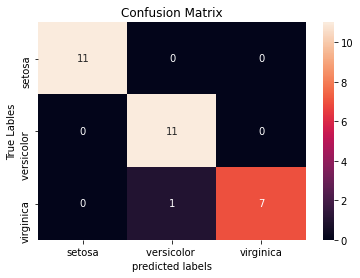

In [53]:
cm = confusion_matrix(y_test.tolist() , predicted.tolist())

ax = plt.subplot()

sns.heatmap(cm , annot = True , ax =ax)

ax.set_xlabel('predicted labels')

ax.set_ylabel('True Lables')

ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['setosa' , 'versicolor ' , 'virginica'])

ax.yaxis.set_ticklabels(['setosa' , 'versicolor ' , 'virginica'])

In [55]:
precision_recall_fscore_support(y_test.tolist() , predicted.tolist() , average = 'macro')


(0.9722222222222222, 0.9583333333333334, 0.9632850241545894, None)

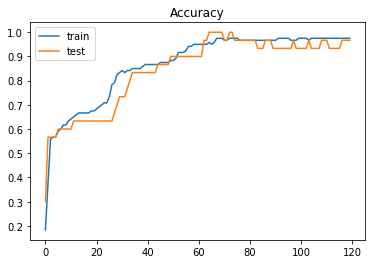

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train' , 'test'])
plt.show()

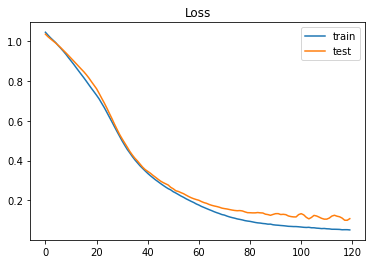

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train' , 'test'])
plt.show()